# Assignment 4
## Due May 14th

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment4_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)
np.random.seed(42)

In [3]:
def get_data_x_cube(n):
        
    x = np.random.uniform(0, 4, n)
    xs = np.expand_dims(x, axis=-1)
    y = 3*(x-2)**3 + 0.1*np.random.normal(0, 1, n)
    ys = np.expand_dims(y, axis=-1)
    
    return xs, ys

In [4]:
def get_data(n):
        
    x = np.random.uniform(0, 4, n)
    xs = np.expand_dims(x, axis=-1)
    y = x + np.random.normal(0, 3, n)
    ys = np.expand_dims(y, axis=-1)
    
    return xs, ys

# Exercise 1

### a)

In [5]:
def MSE(y_pred, y):
    return sum((y_pred-y)**2)/len(y)

### b)

In [6]:
def k_fold_evaluation_MSE(classifier, xs, ys, K=10):
    
    MSEs = []
    for i in range(K):
        x_fold = xs[i::K]
        y_fold = ys[i::K]
        
        classifier.fit(x_fold, y_fold)
        pred = classifier.predict(x_fold)
        #print(MSE(pred, y_fold).shape)
        MSEs.append(MSE(pred, y_fold))
    
    return np.mean(MSEs)
    
    

### c)

In [7]:
def k_fold_cv_ridge(xs, ys, lambdas, K=10):
    crossval_error = []
    for l in lambdas:
        ridge_clsf = Ridge(alpha=l)
        crossval_error.append(k_fold_evaluation_MSE(ridge_clsf, xs, ys, K))
    
    fig = plt.figure()
    ax = plt.gca()
    ax.plot(lambdas, crossval_error)
    ax.set_xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('MSE')
    plt.savefig('Images/1c.png')
    
    return crossval_error


### d)

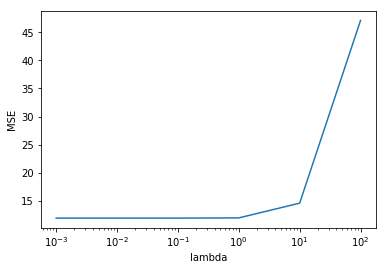

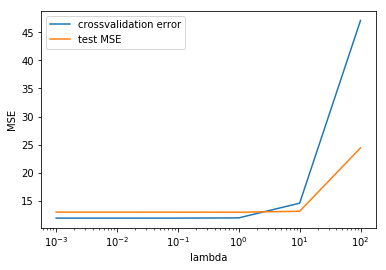

In [8]:
xs, ys = get_data_x_cube(300)
xs_train, ys_train = xs[:100], ys[:100]
xs_test, ys_test = xs[101:], ys[101:]
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

crossval_error= k_fold_cv_ridge(xs, ys, lambdas)
test_MSE = []
for l in lambdas:
    ridge_clsf = Ridge(alpha=l)
    ridge_clsf.fit(xs_train, ys_train)
    pred = ridge_clsf.predict(xs_test)
    
    test_MSE.append(MSE(pred, ys_test))

fig = plt.figure()
ax = plt.gca()
ax.plot(lambdas, crossval_error)
ax.plot(lambdas, test_MSE)
ax.set_xscale('log')
plt.legend(['crossvalidation error', 'test MSE'])
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.savefig('Images/1d.png')

### e)

In [9]:
xs, ys = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=420)
xs_train, ys_train = xs[:100], ys[:100]
xs_test, ys_test = xs[100:], ys[100:]

In [10]:
ks = np.arange(1,11)
parameters = {'n_neighbors': ks}
clf = GridSearchCV(KNeighborsClassifier(weights="uniform"), parameters, iid=False, cv=5, return_train_score=True)
clf.fit(xs_train, ys_train)
accuracy_cv = clf.cv_results_['mean_train_score']

In [11]:
accuracy = np.zeros(len(ks))
    
for i, k in enumerate(ks):
        
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(xs_train, ys_train)
    accuracy[i] = knn.score(xs_test, ys_test)

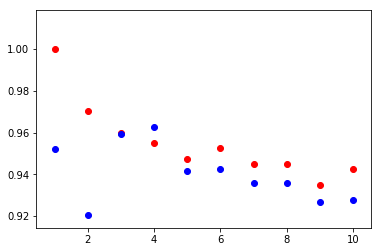

In [12]:
plt.figure()
plt.scatter(ks, accuracy_cv, c="red")
plt.scatter(ks, accuracy, c="blue")

In [13]:
accuracy_cv, accuracy

(array([1.        , 0.97015276, 0.96002618, 0.95496288, 0.94752461,
        0.95249375, 0.94502461, 0.94493046, 0.93502305, 0.94243046]),
 array([0.95210526, 0.92052632, 0.95947368, 0.96263158, 0.94157895,
        0.94263158, 0.93578947, 0.93578947, 0.92684211, 0.92789474]))

# Exercise 2

In [37]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
xs, ys = get_data(400)
xs_train, ys_train = xs[:100], ys[:100]
xs_test, ys_test = xs[101:], ys[101:]

### a)

In [38]:
linear = LinearRegression()
linear.fit(xs_train, ys_train)

pred = linear.predict(xs_test)

linMSE = MSE(pred, ys_test)

### b)

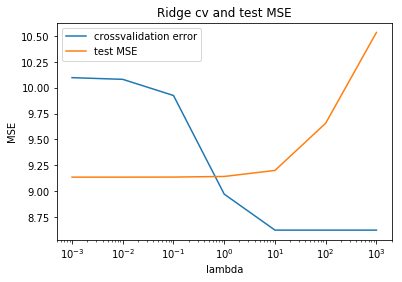

In [39]:
errors_cv = k_fold_cv_ridge(xs_train, ys_train, lambdas, 10)
errors = []

for l in lambdas:
    ridge_clsf = Ridge(alpha=l)
    ridge_clsf.fit(xs_train, ys_train)
    pred = ridge_clsf.predict(xs_test)
    errors.append(MSE(pred, ys_test))

fig = plt.figure()
ax = plt.gca()
ax.plot(lambdas, errors_cv)
ax.plot(lambdas, errors)
ax.set_xscale('log')
plt.title('Ridge cv and test MSE')
plt.legend(['crossvalidation error', 'test MSE'])
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.savefig('Images/2b.png')

### c)

In [40]:
def k_fold_cv_lasso(xs, ys, lambdas, K=10):
    crossval_error = []
    for l in lambdas:
        lasso_clsf = Lasso(alpha=l)
        crossval_error.append(k_fold_evaluation_MSE(lasso_clsf, xs, ys, K))    
    
    return crossval_error


7


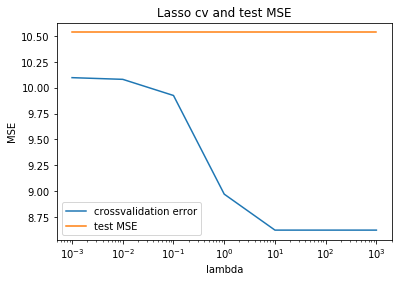

In [41]:
errors_cv = k_fold_cv_lasso(xs_train, ys_train, lambdas, 10)
errors= []

for l in lambdas:
    lasso_clsf = Lasso(alpha=l)
    lasso_clsf.fit(xs_train, ys_train)
    pred = ridge_clsf.predict(xs_test)
    errors.append(MSE(pred, ys_test))

print(len(errors))
fig = plt.figure()
ax = plt.gca()
ax.plot(lambdas, errors_cv)
ax.plot(lambdas, errors)
ax.set_xscale('log')
plt.title('Lasso cv and test MSE')
plt.legend(['crossvalidation error', 'test MSE'])
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.savefig('Images/2c.png')